**This notebooks includes:**

- Timing benchmarks with GUMs Fourier ou spectral
- Empirical probabilities for a class in many samples (GUMs and Potts MRFs)
- Empirical probabilities for equal classes function of the distance (GUMs and Potts MRFs)

*Note for CPU energy monitoring:* To get the CPU energy measure with zeus: `sudo su` then `jupyter-lab --allow-root` and modify `time_complete_sampling()` such that `gpu_energy` becomes `cpu_energy`. We also set `cpu_device = jax.devices('cpu')[0]` and `with jax.default_device(cpu_device):` because we cannot set `jax_platforms=cpu`: if we totally hide the GPU, zeus will complain.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# os.environ["JAX_PLATFORMS"] = "cpu"

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cpu_device = jax.devices('cpu')[0]

In [4]:
key = jax.random.PRNGKey(0)

In [5]:
from mrfx.models import GUM
from mrfx.samplers import GUMSampler

## Timing experiments

In [6]:
kappa = 0.1

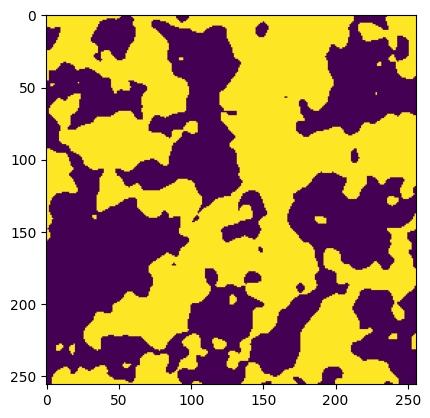

In [7]:
gum = GUM(kappa=kappa, K=2, dim=2)
gum_sampler = GUMSampler(n_bands=2500, lx=256, ly=256, method="spectral")
key, subkey = jax.random.split(key, 2)
gum_x = gum_sampler.sample_image(gum, subkey)[0]
plt.imshow(gum_x)
plt.show()

In [9]:
from mrfx.experiments import time_complete_sampling, plot_benchmark

In [ ]:
# with jax.default_device(cpu_device): # ACTIVATE TO GET CPU
    
key, subkey = jax.random.split(key, 2)
Ks = jnp.arange(2, 8)
sizes = [(2**e, 2**e) for e in range(10, 12)] #[(2**e, 2**e) for e in range(4, 10)]
times, _, _, energy = time_complete_sampling(
    Sampler=GUMSampler,
    Model=GUM,
    key=subkey,
    Ks=Ks,
    sizes=sizes,
    reps=100,
    kwargs_sampler={"method": "fourier"},
    kwargs_model={"kappa": kappa, "dim": 2},
    exp_name="GUMSampler_fourier_CPU",
    with_energy=True,
    with_jit=True,
    with_n_iter=False,
)

[2025-09-26 14:12:28,623] [zeus.device.gpu.nvidia](nvidia.py:47) pynvml is available and initialized.
[2025-09-26 14:12:28,630] [zeus.device.cpu.rapl](rapl.py:137) RAPL directory (/sys/class/powercap/intel-rapl) is available.
[2025-09-26 14:12:28,631] [RaplWraparoundTracker](rapl.py:85) Monitoring wrap around of /sys/class/powercap/intel-rapl/intel-rapl:0/energy_uj
[2025-09-26 14:12:28,634] [RaplWraparoundTracker](rapl.py:85) Monitoring wrap around of /sys/class/powercap/intel-rapl/intel-rapl:0/intel-rapl:0:0/energy_uj
[2025-09-26 14:12:28,635] [RaplWraparoundTracker](rapl.py:85) Monitoring wrap around of /sys/class/powercap/intel-rapl/intel-rapl:0/intel-rapl:0:1/energy_uj
[2025-09-26 14:12:28,637] [RaplWraparoundTracker](rapl.py:85) Monitoring wrap around of /sys/class/powercap/intel-rapl/intel-rapl:1/energy_uj
[2025-09-26 14:12:28,638] [zeus.monitor.energy](energy.py:223) Monitoring GPU indices [0].
[2025-09-26 14:12:28,639] [zeus.monitor.energy](energy.py:224) Monitoring CPU indices

/home/hugo/Documents/recherche/gum/code/mrfx/mrfx/experiments/_benchmark.py:216: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  model = Model(K=k, **kwargs_model)


[2025-09-26 14:12:29,219] [zeus.utils.framework](framework.py:47) JAX with CUDA support is available.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
k=np.int32(2), lx=1024, ly=1024, compilation_time=0.5781705379486084,runtime_mean=0.2975390148162842, energy_mean=7.113319199999969
Rep ( / 100): 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
k=np.int32(2), lx=2048, ly=2048, compilation_time=1.359151840209961,runtime_mean=1.0805000495910644, energy_mean=27.131155530000104
Rep ( / 100): 1 2 3 4 5 6 7 8 9 10

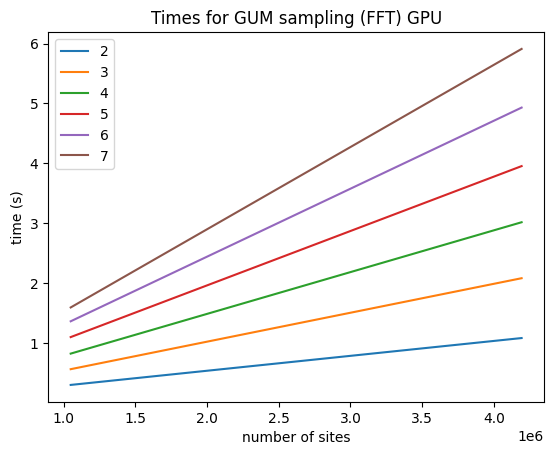

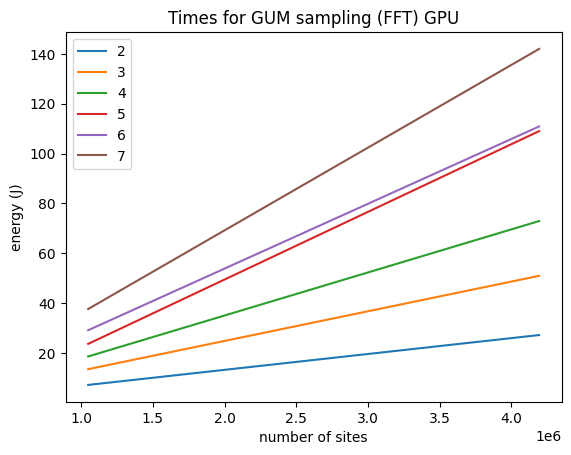

In [8]:
plot_benchmark(
    Ks, sizes, times, title="Times for GUM sampling (FFT) GPU", ylabel="time (s)"
)
plot_benchmark(
    Ks, sizes, energy, title="Times for GUM sampling (FFT) GPU", ylabel="energy (J)"
)

In [10]:
# with jax.default_device(cpu_device): # ACTIVATE TO GET CPU

key, subkey = jax.random.split(key, 2)
Ks = jnp.arange(2, 8)
sizes = [(2**e, 2**e) for e in range(10, 12)] #[(2**e, 2**e) for e in range(4, 10)]
times, _, _, energy = time_complete_sampling(
    Sampler=GUMSampler,
    Model=GUM,
    key=subkey,
    Ks=Ks,
    sizes=sizes,
    reps=100,
    kwargs_sampler={"n_bands": 1500, "method": "spectral"},
    kwargs_model={"kappa": 0.05, "dim": 2},
    exp_name="GUMSampler_spectral_CPU",
    with_energy=True,
    with_jit=True,
    with_n_iter=False,
)

[2025-09-29 09:57:56,165] [zeus.device.gpu.nvidia](nvidia.py:47) pynvml is available and initialized.
[2025-09-29 09:57:56,172] [zeus.device.cpu.rapl](rapl.py:137) RAPL directory (/sys/class/powercap/intel-rapl) is available.
[2025-09-29 09:57:56,173] [RaplWraparoundTracker](rapl.py:85) Monitoring wrap around of /sys/class/powercap/intel-rapl/intel-rapl:0/energy_uj
[2025-09-29 09:57:56,175] [RaplWraparoundTracker](rapl.py:85) Monitoring wrap around of /sys/class/powercap/intel-rapl/intel-rapl:0/intel-rapl:0:0/energy_uj
[2025-09-29 09:57:56,176] [RaplWraparoundTracker](rapl.py:85) Monitoring wrap around of /sys/class/powercap/intel-rapl/intel-rapl:0/intel-rapl:0:1/energy_uj
[2025-09-29 09:57:56,177] [RaplWraparoundTracker](rapl.py:85) Monitoring wrap around of /sys/class/powercap/intel-rapl/intel-rapl:1/energy_uj
[2025-09-29 09:57:56,178] [zeus.monitor.energy](energy.py:223) Monitoring GPU indices [0].
[2025-09-29 09:57:56,178] [zeus.monitor.energy](energy.py:224) Monitoring CPU indices

/home/hugo/Documents/recherche/gum/code/mrfx/mrfx/experiments/_benchmark.py:216: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  model = Model(K=k, **kwargs_model)


[2025-09-29 09:57:58,667] [zeus.utils.framework](framework.py:47) JAX with CUDA support is available.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
k=np.int32(2), lx=1024, ly=1024, compilation_time=2.4871575832366943,runtime_mean=2.1031118488311766, energy_mean=109.43681763000039
Rep ( / 100): 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
k=np.int32(2), lx=2048, ly=2048, compilation_time=9.111824989318848,runtime_mean=8.782758915424347, energy_mean=409.09034975999987
Rep ( / 100): 1 2 3 4 5 6 7 8 9 10

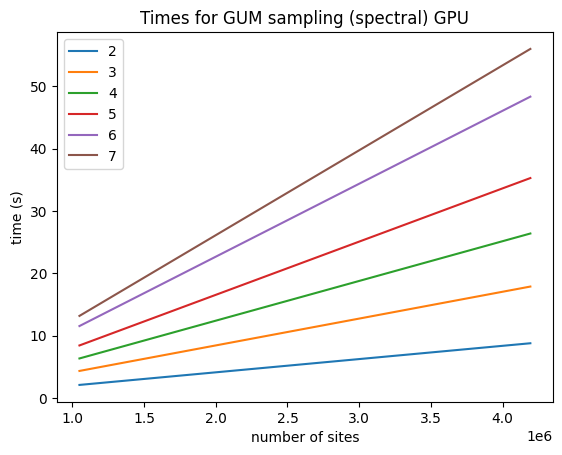

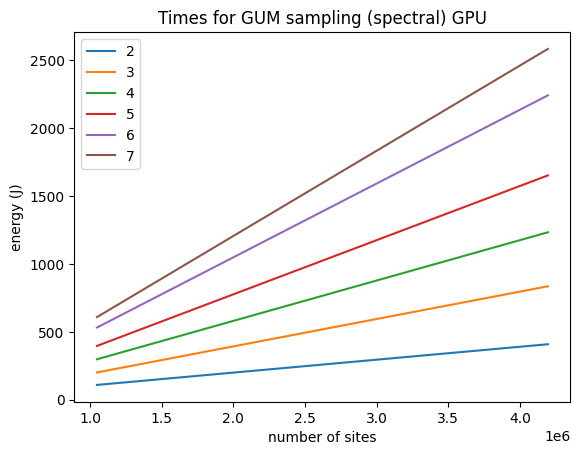

In [11]:
from mrfx.experiments import plot_benchmark

plot_benchmark(
    Ks, sizes, times, title="Times for GUM sampling (spectral) GPU", ylabel="time (s)"
)
plot_benchmark(
    Ks,
    sizes,
    energy,
    title="Times for GUM sampling (spectral) GPU",
    ylabel="energy (J)",
)

## Compute statistics 

In [9]:
def compute_stats(samples):
    for k in range(len(samples)):
        p_x_0 = 0
        for X in samples[k][0]:
            p_x_0 += (X == 0).mean()
        p_x_0 /= len(samples[k][0])
        std_p_x_0 = 0
        for X in samples[k][0]:
            std_p_x_0 += (p_x_0 - (X == 0).mean()) ** 2
        std_p_x_0 /= len(samples[k][0])
        std_p_x_0 = np.sqrt(std_p_x_0)
        print(Ks[k], p_x_0, std_p_x_0)

In [26]:
kappa = 0.1

In [27]:
from mrfx.experiments import time_complete_sampling
key, subkey = jax.random.split(key, 2)
Ks = jnp.arange(7, 8)
sizes = [(150, 150)]
times, _, samples_gum_fourier = time_complete_sampling(
    Sampler=GUMSampler,
    Model=GUM,
    key=subkey,
    Ks=Ks,
    sizes=sizes,
    reps=50,
    kwargs_sampler={"method": "fourier"},
    kwargs_model={"kappa": kappa, "dim": 2},
    return_X=True,
    with_jit=True,
)

with_n_iter is automatically set to False with GUM models
Rep ( / 50): 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
k=np.int32(7), lx=150, ly=150, compilation_time=5.879948377609253,runtime_mean=0.051595425605773924, 

In [16]:
len(samples_gum_fourier[0][0])

50

In [17]:
compute_stats(samples_gum_fourier)

5 0.1889876 0.051383186


In [28]:
key, subkey = jax.random.split(key, 2)
Ks = jnp.arange(7, 8)
sizes = [(150, 150)]
times, _, samples_gum_spectral = time_complete_sampling(
    Sampler=GUMSampler,
    Model=GUM,
    key=subkey,
    Ks=Ks,
    sizes=sizes,
    reps=50,
    kwargs_sampler={"method": "spectral", "n_bands": 2500},
    kwargs_model={"kappa": kappa, "dim": 2},
    return_X=True,
    with_jit=True,
)

with_n_iter is automatically set to False with GUM models
Rep ( / 50): 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
k=np.int32(7), lx=150, ly=150, compilation_time=9.068609476089478,runtime_mean=0.02823981285095215, 

In [19]:
compute_stats(samples_gum_spectral)

5 0.20628713 0.066988885


In [29]:
from functools import partial
from mrfx.samplers._utils import euclidean_dist


@partial(jax.jit, static_argnames=["lx", "ly", "distance_function"])
def get_neigh_at_d(xy, d, X, lx, ly, distance_function):
    """
    from a pixel (x,y) get the values of all the neighbors at distance d
    """
    ind = jnp.dstack(jnp.meshgrid(jnp.arange(lx), jnp.arange(ly))).reshape((-1, 2))
    v_eval = jax.vmap(
        lambda all_x_y: distance_function(
            x1=xy[0], x2=all_x_y[0], y1=xy[1], y2=all_x_y[1], lx=lx, ly=ly
        )
    )
    dists = v_eval(ind).squeeze()
    return jnp.where(
        jnp.logical_and(dists <= d + 0.1, dists >= d - 0.1), X.flatten(), jnp.nan
    )


def compute_proba_with_d(samples, lx, ly, exp_name=None):
    distances = jnp.arange(0, 50)

    ind = jnp.dstack(jnp.meshgrid(jnp.arange(lx), jnp.arange(ly))).reshape((-1, 2))

    avg_on_samples = jnp.zeros(distances.shape)
    reps = 10
    for i in range(reps):

        def compute_proba_at_d(carry, d):  # , X, lx, ly):
            (X,) = carry

            def compute_proba_at_d_one_site(xy, d):
                neigh_at_d = get_neigh_at_d(xy, d, X, lx, ly, euclidean_dist)
                # idx_neigh_at_d = jnp.nonzero(~jnp.isnan(neigh_at_d), size=lx*ly, fill_value=jnp.nan)
                return jnp.sum(
                    jnp.logical_and(
                        neigh_at_d == X[xy[1], xy[0]],  # careful with indexing here!
                        ~jnp.isnan(neigh_at_d),
                    )
                ) / jnp.sum(~jnp.isnan(neigh_at_d))

            v_compute_proba_at_d_one_site = jax.vmap(
                compute_proba_at_d_one_site, (0, None)
            )
            res = v_compute_proba_at_d_one_site(ind, d)
            return (X,), jnp.mean(res)

        # scan because we must handle d sequentially otherwise RAM explodes
        _, probas_at_d = jax.lax.scan(
            compute_proba_at_d, (samples[0][0][i],), distances
        )
        avg_on_samples += probas_at_d
    # v_compute_proba_at_d = jax.vmap(compute_proba_at_d, (0, None, None, None))
    # return v_compute_proba_at_d(distances, samples[0][0][0], 100, 100)
    print(avg_on_samples / reps)
    if exp_name is not None:
        df = pd.DataFrame(
            {"d": distances} | {"proba_equal_at_d": avg_on_samples / reps}
        )
        df.to_csv(f"{exp_name}.csv", index=False)
    return avg_on_samples / reps

In [30]:
with jax.default_device(jax.devices("cpu")[0]): # Here we always go to CPU otherwise RAM explodes
    probas_with_d_gum_fourier = compute_proba_with_d(
        samples_gum_fourier, 150, 150, "proba_with_d_GUM_Fourier"
    )
    probas_with_d_gum_spectral = compute_proba_with_d(
        samples_gum_spectral, 150, 150, "proba_with_d_GUM_Spectral"
    )

[1.         0.86939925 0.7768022  0.7013285  0.6383433  0.5829377
 0.5358435  0.49557352 0.46009785 0.4301045  0.40158233 0.3766603
 0.3533277  0.33397502 0.31685314 0.2993928  0.28496248 0.27140558
 0.25999194 0.24975201 0.239243   0.23009558 0.22140482 0.21401636
 0.20616417 0.2004877  0.19461863 0.18855318 0.18207003 0.17762244
 0.17411745 0.16929485 0.16563508 0.16127111 0.15970902 0.15686691
 0.15450247 0.15189633 0.15177417 0.15055661 0.14826053 0.14725518
 0.1459659  0.14470522 0.14414933 0.14294654 0.14313975 0.14152795
 0.1409507  0.14071539]
[1.         0.9147007  0.83433926 0.76018894 0.6931737  0.63079834
 0.5774671  0.530808   0.48988444 0.45518485 0.4217359  0.3939801
 0.36631972 0.3447473  0.32670182 0.30707544 0.29357368 0.27671552
 0.26479045 0.25391558 0.24248138 0.23212978 0.223539   0.2143066
 0.20644109 0.19930594 0.19265908 0.18697071 0.17932644 0.17525986
 0.17036718 0.16487035 0.16157979 0.1563904  0.15516198 0.1511966
 0.14843342 0.1450388  0.1453943  0.1440189

In [32]:
import jax
from mrfx.experiments import time_complete_sampling, plot_benchmark
from mrfx.samplers import ChromaticGibbsSampler
from mrfx.models import Potts

key = jax.random.PRNGKey(0)

K = 5
beta = 1
potts_model = Potts(K=K, beta=beta, neigh_size=1)

Ks = np.arange(7, 8)
sizes = [(150, 150)]  # (2 ** e, 2 ** e) for e in range(8, 10)]
reps = 50

key, subkey = jax.random.split(key, 2)
times, n_iterations, samples_mrf_gibbs = time_complete_sampling(
    ChromaticGibbsSampler,
    Potts,
    subkey,
    Ks,
    sizes,
    reps,
    kwargs_sampler={
        "eps": 0.05,
        "max_iter": 10000,
        "color_update_type": "vmap_in_color",
    },
    kwargs_model={"beta": beta},
    return_X=True,
)

Rep ( / 50): Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
1 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
2 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
3 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
4 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
5 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
6 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
7 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
8 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
9 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
10 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
11 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
1

In [33]:
compute_stats(samples_mrf_gibbs)

7 0.15387112 0.05316624


In [34]:
with jax.default_device(jax.devices("cpu")[0]):
    probas_with_d_mrf_gibbs = compute_proba_with_d(
        samples_mrf_gibbs, 150, 150, "proba_with_d_mrf_gibbs"
    )

[1.         0.9167948  0.8666152  0.81071585 0.7568904  0.7046708
 0.6515415  0.604402   0.5584086  0.516152   0.47391453 0.43234777
 0.3976255  0.36459357 0.33408263 0.30606407 0.27928337 0.25884387
 0.23874557 0.220922   0.2064977  0.1932195  0.1840366  0.17234017
 0.1652867  0.1590299  0.1536443  0.15098858 0.14586559 0.14559695
 0.14278588 0.14035584 0.14048734 0.13818042 0.140838   0.13892336
 0.13874099 0.13735585 0.1387895  0.13955706 0.13770911 0.13799772
 0.13739662 0.13781123 0.13788071 0.13584402 0.13826835 0.13653669
 0.13661286 0.13728932]


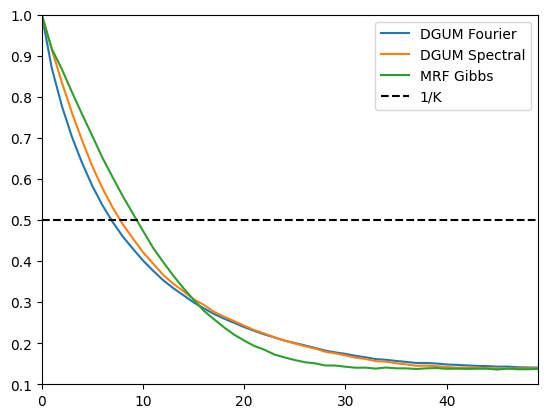

In [35]:
plt.rcParams.update({"font.size": 10})
distances = jnp.arange(0, 50)
title = "Empirical $p(x_i = x_j | \| i-j \| = d)$"
plt.ylim(1 / K - 0.1, 1)
plt.xlim(distances[0], distances[-1])
plt.plot(distances, probas_with_d_gum_fourier, label="DGUM Fourier")
plt.plot(distances, probas_with_d_gum_spectral, label="DGUM Spectral")
plt.plot(distances, probas_with_d_mrf_gibbs, label="MRF Gibbs")

plt.plot(distances, np.ones_like(distances) / 2, "--k", label="1/K")
plt.legend()
plt.savefig(f"{title}.pdf")